In [682]:
import pickle as cPickle
import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [683]:
def load_data():
    '''
    traning_data - массив из 50000 тренировочных примеров, 
    0 - элемент содержит массив массивов бит изображений
    1 - соответствующий картинке номер
    validation_data и test_data аналогичные, но содержат 
    по 10000 значений
    '''
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [684]:
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [685]:


def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    #print(training_inputs[0])
    #print(training_results[0])
    training_data = zip(training_inputs, training_results)
    #print(training_data[0])
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_zipped = zip(test_inputs, te_d[1])
    # print(training_data, validation_data, test_zipped)
    return (training_data, validation_data,test_zipped)

In [686]:
# training, validation, test=load_data_wrapper()


In [687]:
#trd = list(training)

In [688]:
#print(len(trd))
#print(trd[1:10][1])
#nerobit = trd[0:2]
#print(len(nerobit))
#print(nerobit[0][0])

#mini_batches =[trd[0:10]
#                for k in range(0, n, 10)]

In [689]:
def vectorized_result(j,size):
    e = np.zeros((10, size))
    print('size',size)
    cnt=0
    for i in j:
        print('i:',i,'j:',j)
        e[i][cnt] = 1.0
        cnt+=1
    return e

size 5
i: 5 j: [5 0 4 1 9]
i: 0 j: [5 0 4 1 9]
i: 4 j: [5 0 4 1 9]
i: 1 j: [5 0 4 1 9]
i: 9 j: [5 0 4 1 9]
[[ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]


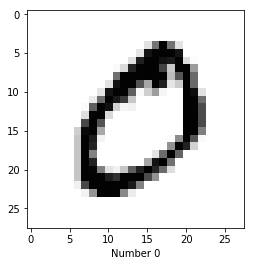

In [690]:
training, validation, test = load_data()
Xdisplay = np.reshape(training[0][1],(28,28))
y = vectorized_result(training[1][0:5],5)
print(y)
#print(training[1][0:10])
pl.imshow(Xdisplay,cmap='Greys')
pl.xlabel(('Number %d' % training[1][1]))  
X = np.float32(training[0][0:5])#, dtype('float32')

In [691]:
print(X.T.shape)
# b = np.dot(X.T,5)
# for ln in b:
#     for el in ln:
#         if el >0:
#             print(el)

(784, 5)


In [692]:
#testInput = np.arange(-6,6,0.01)
#plot(testInput, sigmoid(testInput), linewidth= 2)
#grid(1)

In [693]:
#net = Neural_Network()

In [694]:
#net.forward(X)

In [695]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 28*28
        self.outputLayerSize = 10
        self.hiddenLayerSize = 20
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        # print (self.W1.shape,self.W2.shape)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        # print ('z2',self.z2)
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        # print (J)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        # print('YHat',self.yHat)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        # print('delta',delta3)
        # print('delta.shape',delta3.shape)
        # print('a2',self.a2.shape)
        dJdW2 = np.dot(self.a2.T, delta3)
        # print('Djdw',dJdW2)
        
        delta2 = np.float32(np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2))
        # print('delta2', delta2)
        # print('delta2.shape:',delta2.shape)
        # print('X.T.shape:',X.T.shape)

        dJdW1 = np.dot(X.T, delta2)
#         for ln in dJdW1:
#             for el in ln:
#                 if el >0:
#                     print(el)
        # dJdW1 = np.dot(2, delta2)
        # dJdW1 = np.dot(X.T, 2)
        # print (dJdW1,dJdW2)
        # print('sigmoid.z2',self.sigmoidPrime(self.z2))
        # print('W2.T',self.W2.T.shape)
        # print('delta2',delta2.shape)
        # print('X.T',X.T.shape)
        return dJdW1, dJdW2
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [696]:
NN = Neural_Network()

In [697]:
NN.forward(X)

array([[ 0.29783168,  0.73420857,  0.8110336 ,  0.1943249 ,  0.71288   ,
         0.76893265,  0.50502578,  0.84213458,  0.30499143,  0.18739249],
       [ 0.92831858,  0.94763795,  0.22692663,  0.97775423,  0.94527111,
         0.99181677,  0.7866672 ,  0.78774577,  0.06041613,  0.11041786],
       [ 0.24912447,  0.63689408,  0.65955181,  0.9266936 ,  0.26099407,
         0.75610231,  0.40940584,  0.35990974,  0.098398  ,  0.79992309],
       [ 0.14129299,  0.25755717,  0.29512754,  0.21232832,  0.21265414,
         0.75113815,  0.60655473,  0.84478534,  0.28069923,  0.95549912],
       [ 0.24790739,  0.35411594,  0.88829895,  0.75784521,  0.36085092,
         0.38206395,  0.36649839,  0.8166413 ,  0.64359448,  0.86936023]])

In [698]:
cost1 = NN.costFunction(X,y.T)

In [699]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)

In [700]:
print('dJdW1',dJdW1,'dJdW2',dJdW2)

dJdW1 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] dJdW2 [[  6.16729686e-02  -4.24124013e-03   1.99075517e-01   1.99973890e-01
    1.58534827e-01   2.47706342e-01   3.68384647e-01   3.70232595e-01
    2.08338000e-01   4.49974458e-02]
 [  1.22036699e-03   3.69031922e-02   5.53430515e-02   2.77850576e-02
    6.22895360e-02   2.41200398e-02   1.58625699e-01   1.52993538e-01
    1.47755743e-02   1.79133726e-02]
 [  9.93529040e-02   8.75999459e-02   2.35238231e-01   2.00246730e-01
    1.06625062e-01   2.30976372e-01   2.74113273e-01   2.75281790e-01
    2.15476688e-01   7.46560642e-02]
 [  7.85116276e-02   2.57808647e-01   2.57425237e-01   1.94734425e-01
   -2.68497805e-02   2.18926822e-01   2.98033545e-01   3.11305870e-01
    1.29833150e-01   1.26505583e-01]
 [  2.51700367e-02   1.00108592e-01   9.92687828e-02   9.46150566e-02
    1.0136

In [701]:
for i in range(0,10):
    cost = NN.costFunction(X,y.T)
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
    scalar = 3
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
print(cost)

0.20434152282


In [702]:
result=NN.forward(X)
result=np.around(result, decimals = 2)
print(result)
# print(y.T)
yarr=training[1][0:5]
res=[np.argmax(i) for i in  result]
print(res)
print(yarr)
# print(list(zip(res,yarr)))
sum(int(x == y) for (x, y) in list(zip(res,yarr)))

[[ 0.01  0.12  0.01  0.    0.    0.91  0.    0.    0.01  0.02]
 [ 0.93  0.09  0.    0.    0.06  0.08  0.    0.    0.    0.  ]
 [ 0.02  0.12  0.    0.    0.92  0.    0.    0.    0.    0.02]
 [ 0.    0.79  0.    0.    0.06  0.    0.    0.    0.    0.05]
 [ 0.02  0.16  0.    0.    0.04  0.    0.    0.    0.    0.71]]
[5, 0, 4, 1, 9]
[5 0 4 1 9]


5

In [703]:
print(NN.W1)

[[-1.13724779  0.36115991  0.15163983 ..., -2.23574647  0.58348923
  -0.46372796]
 [-0.2675969   0.12586074  2.27462729 ..., -1.00534145 -0.59189671
   0.15829486]
 [-1.12952533  0.21603736  0.1304454  ...,  0.76148534  0.41425483
   1.04249857]
 ..., 
 [ 0.07904741 -0.49261582 -0.42973237 ...,  1.98929559  1.61752557
   1.14404707]
 [-1.27256361  2.73648741 -0.56032951 ..., -0.56103906 -1.03119214
   1.66642162]
 [-0.69957487  0.81426146  0.33320516 ...,  1.15161609  0.41547856
  -0.00745021]]


In [704]:
print ('cost1:',cost1,'cost2:',cost2)

cost1: 9.14574061602 cost2: 6.40121241732


In [705]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
#print ('NN.W1:',NN.W1,'NN.W2:',NN.W2)
cost3 = NN.costFunction(X, y.T)

In [706]:
print (cost2, cost3)

6.40121241732 0.0772056756005


In [707]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y.T)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y.T)

In [708]:
print (cost2, cost3)

6.40121241732 0.0654015959906


In [709]:
#from scipy import optimize

In [710]:
'''
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        # Алгоритм оптимизации по методу BFGS (алгоритм оптимизации минимизации ошибки (поиск минимума))
        options = {'maxiter': 2, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
'''

"\nclass trainer(object):\n    def __init__(self, N):\n        #Make Local reference to network:\n        self.N = N\n        \n    def callbackF(self, params):\n        self.N.setParams(params)\n        self.J.append(self.N.costFunction(self.X, self.y))   \n        \n    def costFunctionWrapper(self, params, X, y):\n        self.N.setParams(params)\n        cost = self.N.costFunction(X, y)\n        grad = self.N.computeGradients(X,y)\n        \n        return cost, grad\n        \n    def train(self, X, y):\n        #Make an internal variable for the callback function:\n        self.X = X\n        self.y = y\n\n        #Make empty list to store costs:\n        self.J = []\n        \n        params0 = self.N.getParams()\n\n        # Алгоритм оптимизации по методу BFGS (алгоритм оптимизации минимизации ошибки (поиск минимума))\n        options = {'maxiter': 2, 'disp' : True}\n        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS',                    

In [711]:
#NN = Neural_Network()

In [712]:
#T = trainer(NN)

In [713]:
#T.train(X,y.T)

In [714]:
#print(T.J)

In [715]:
# plot(T.J)
# grid(1)
# xlabel('Iterations')
# ylabel('Cost')

In [716]:
#NN.costFunctionPrime(X,y)

In [717]:
#NN.forward(X)

In [718]:
#y

In [719]:
'''
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()
'''

'\n#Test network for various combinations of sleep/study:\nhoursSleep = linspace(0, 10, 100)\nhoursStudy = linspace(0, 5, 100)\n\n#Normalize data (same way training data way normalized)\nhoursSleepNorm = hoursSleep/10.\nhoursStudyNorm = hoursStudy/5.\n\n#Create 2-d versions of input for plotting\na, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)\n\n#Join into a single input matrix:\nallInputs = np.zeros((a.size, 2))\nallInputs[:, 0] = a.ravel()\nallInputs[:, 1] = b.ravel()\n'

In [720]:
#allOutputs = NN.forward(allInputs)

In [721]:
'''
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')
'''

"\n#Contour Plot:\nyy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))\nxx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T\n\nCS = contour(xx,yy,100*allOutputs.reshape(100, 100))\nclabel(CS, inline=1, fontsize=10)\nxlabel('Hours Sleep')\nylabel('Hours Study')\n"

In [722]:
'''
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
'''

"\n#3D plot:\n\n##Uncomment to plot out-of-notebook (you'll be able to rotate)\n#%matplotlib qt\n\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure()\nax = fig.gca(projection='3d')\n\nsurf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100),                        cmap=cm.jet)\n\nax.set_xlabel('Hours Sleep')\nax.set_ylabel('Hours Study')\nax.set_zlabel('Test Score')\n"